# Execute the code below

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
titanic = sns.load_dataset('titanic')
titanic['survived'] = titanic['survived'].apply(lambda x: 'did not survive' if x == 0 else 'survived')

In [ ]:
titanic.shape

(891, 15)

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,did not survive,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,survived,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,survived,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,survived,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,did not survive,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**We are going to learn machine learning concepts with the titanic dataset, one of the most infamous shipwrecks in history.** 

Also as a fun fact, this dataset is one of the most famous datasets around in terms of machine learning next to the MNIST and Iris dataset!

# Data preprocessing


Machine learning is nothing without fine data preprocessing and feature engineering.  
Modify the titanic dataset by:

* Selecting dedicated and useful features (i.e columns), only these ones : `survived`, `pclass`, `sex`, `age`, `embark_town`
* Removing rows with NaN data
* Use `factorize` to recode features `sex` (gender) and `embark_town` (the harbour city) into numerical data, because ML needs (and loves) numerical data.

*NB : please really use `factorize`. We'll use `get_dummies`at the end of the quest, to compare it.*

Your should get something like that:

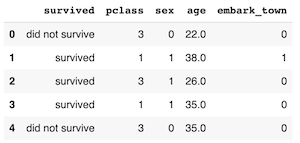

In [ ]:
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'embark_town']]
titanic.head()

,survived,pclass,sex,age,embark_town
0,did not survive,3,male,22.0,Southampton
1,survived,1,female,38.0,Cherbourg
2,survived,3,female,26.0,Southampton
3,survived,1,female,35.0,Southampton
4,did not survive,3,male,35.0,Southampton


In [ ]:
# It's up to you:

titanic['sex'] = titanic['sex'].factorize()[0]
titanic['embark_town'] = titanic['embark_town'].factorize()[0]
titanic.head()

<ipython-input-28-639250146b3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['sex'] = titanic['sex'].factorize()[0]
<ipython-input-28-639250146b3a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['embark_town'] = titanic['embark_town'].factorize()[0]


,survived,pclass,sex,age,embark_town
0,did not survive,3,0,22.0,0
1,survived,1,1,38.0,1
2,survived,3,1,26.0,0
3,survived,1,1,35.0,0
4,did not survive,3,0,35.0,0


# KNN classification with Scikit-Learn

## Train Test Split Data


First you have to divide the titanic dataframe into 2 separated dataframes :
  - `y` with the feature to be predicted (i.e. survived)
  - `X` with the other features that will be used for the model (all numeric features + sex recoded with factorize + embark_town recoded with factorize)

Your `X` should be something like that:

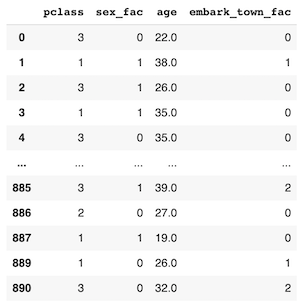


In [ ]:
# Your code here

titanic = titanic.rename(columns={"sex": "sex_fac", "embark_town": "embark_town_fac"})
y = titanic['survived']
X = titanic.loc[:, titanic.select_dtypes(exclude=['object']).columns.tolist()]
X

,pclass,sex_fac,age,embark_town_fac
0,3,0,22.0,0
1,1,1,38.0,1
2,3,1,26.0,0
3,1,1,35.0,0
4,3,0,35.0,0
...,...,...,...,...
886,2,0,27.0,0
887,1,1,19.0,0
888,3,1,NaN,0
889,1,0,26.0,1



And then from `X` and `y`, you need to separate them for training and testing your model :
* Use 75% of data for training, the rest for testing
* Please split data with `random_state = 55`

[See the previous quest on train-test split if needed](https://odyssey.wildcodeschool.com/quests/581)

In [ ]:
# Your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 891
The length of the train dataset is   : 668
The length of the test dataset is    : 223


## Model initialization

CONGRATS !!! You are going to develop your first ML model for KNN classification.  
For that, please create a `model` object that initialises your model with the KNN classifier


[More info here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier

class KNNModel:
    def __init__(self, n_neighbors=5):
        self.model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    def fit(self, X, y):
        self.model.fit(X, y)
    
    def predict(self, X):
        return self.model.predict(X)


model = KNNModel()
model

## Model fitting


Now you have to fit your model on the training data.

[More info here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
# Your code here
model = model.fit(X_train, y_train)
print(model)

ValueError: ignored

## Make predictions

You model is ready for prediction !

Make prediction for yourself !  
Change the data below and evaluate your chance of survival ...

In [ ]:
# Your code here
my_class = 3
my_sex = 0
my_age = 28
my_town = 0
my_data = np.array([my_class, my_sex, my_age, my_town]).reshape(1,4)
print(model.predict(my_data))

In [ ]:
# Then you can execute this code to see probabilities per class
for i, j in zip(model.classes_, model.predict_proba(my_data)[0]):
  print("Prediction probability for:", i, "is", j)

## Model evaluation

Last but not least, you should evaluate the accuracy of your model.  
You can compute the **accuracy score**  directly with the well-known `.score()` method. Remember to compare train score and test score to evaluate overfitting.
Please remember that other metrics are available to evaluate classification models such as precision, recall, f1 score and all together compose the `confusion matrix`.

In [ ]:
# Your code here to compare test and train score (accuracy score). Is there overfitting?


In [ ]:
# You can execute this code to get the confusion matrix

from sklearn.metrics import confusion_matrix
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model.predict(X_test)),
             index = model.classes_ + " ACTUAL",
             columns = model.classes_ + " PREDICTED")

**How many false positives are there?  In other words, how many people were predicted to die when in fact they survived?**

Performances of our model are pretty poor and could be explained by the original dataset.  
Anoher way is to tune the hyperparameter such as the number of neighbors ...

## Hyperparameter - improve you model


Let's play with the `n_neighbors` and `weights` hyperparameters of the model.  
* Evaluate the accuracy score (only on the test set) of your models by adjusting the hyperparameter `n_neighbors`  from 2 to 10, and changing `weights` between `uniform` and `distance`.
* What is the values of `n_neighbors` and `weights` that leads to the best score ?

*NB: you could use a loop to test the different hyperparameter values*

*Tip: you should find as optimal value `n_neighbors = 2` and `weights = 'distance'`, with a test score value of `0.809`.*

In [ ]:
# Your code here

for i in range(2,11):
  

# Let's go back to data processing to improve our model


In [ ]:
# Let's re-import data in a new dataset to compare, just execute the code below:
titanic2 = sns.load_dataset('titanic')
titanic2['survived'] = titanic2['survived'].apply(lambda x: 'did not survive' if x == 0 else 'survived')
titanic2.head()


Please do the same data processing as previously, but change `embark_town` (the harbour city) with get_dummies (and not factorize).
Then initialize, fit and score your model. Is it better? 

You should have a `X` like this one:

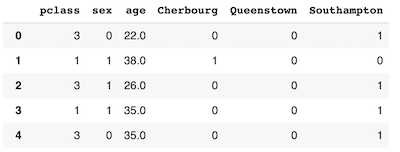

In [ ]:
# It's up to you:



# Conclusions
* Congrats !!! You just landed on the MACHINE LEARNING CLASSIFICATION planet
* The KNN classifier is an algorithm from supervised learning part of ML
* Scikit learn is the to-know-and-to-love toolbox for ML
* Our KNN classifier could be improved with hyperparameter tuning. 
* There is no perfect algorithm, we can very often improve a score by **feature engineering**, rather than looking for another algorithm
* Other algorithms should be tested for selecting the best one, but it is another story ... to be continued ML Data Wilders :) 